Trace names are client_id, sample_path, label_name, label_id
356
dict_values([183, 269, 310, 321, 154, 177, 178, 152, 159, 105, 130, 409, 175, 324, 235, 87, 147, 113, 365, 180, 374, 156, 162, 234, 158, 182, 178, 140, 144, 166, 162, 180, 152, 183, 373, 179, 173, 140, 155, 268, 294, 305, 322, 178, 179, 326, 349, 245, 175, 274, 167, 182, 175, 163, 183, 242, 286, 334, 213, 179, 183, 383, 283, 174, 154, 173, 302, 332, 356, 183, 140, 180, 149, 180, 178, 140, 398, 182, 294, 239, 370, 263, 170, 171, 363, 178, 124, 169, 116, 186, 178, 355, 328, 158, 171, 284, 403, 168, 100, 166, 368, 318, 183, 176, 239, 181, 395, 172, 168, 278, 353, 157, 155, 165, 149, 386, 180, 175, 279, 179, 173, 175, 159, 176, 342, 116, 178, 312, 269, 171, 362, 177, 383, 347, 248, 142, 166, 396, 180, 367, 167, 176, 312, 150, 188, 181, 317, 347, 400, 360, 155, 319, 163, 361, 109, 264, 183, 274, 341, 307, 297, 181, 178, 184, 327, 165, 353, 155, 166, 181, 354, 176, 378, 184, 171, 214, 179, 151, 166, 269, 156, 168, 395, 171, 368

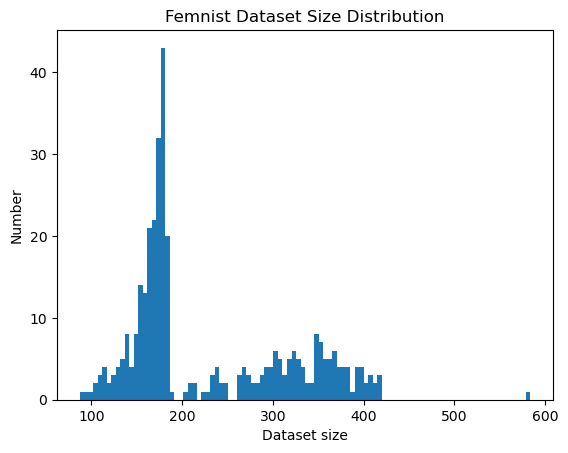

In [1]:
import csv
import matplotlib.pyplot as plt

unique_client_ids = {}
data_map_file = '../datasets/femnist/client_data_mapping/train.csv'
with open(data_map_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    read_first = True
    sample_id = 0

    client_id = 0
    size_dict = {}

    for row in csv_reader:
        if read_first:
            print(f'Trace names are {", ".join(row)}')
            read_first = False
        else:
            idx = row[0]
            if idx not in unique_client_ids:
                unique_client_ids[idx] = client_id
                size_dict[client_id] = 0
                client_id += 1

            size_dict[unique_client_ids[idx]] += 1
            

print(len(size_dict))
print(size_dict.values())
plt.hist(size_dict.values(), bins=100)
plt.xlabel('Dataset size')
plt.ylabel('Number')
plt.title('Femnist Dataset Size Distribution')
plt.show()

In [5]:
import pickle
file_path = '../datasets/device_info/client_dataset_size'

# Pickle and dump the data to the file
with open(file_path, 'wb') as file:
    pickle.dump(size_dict, file)

500000


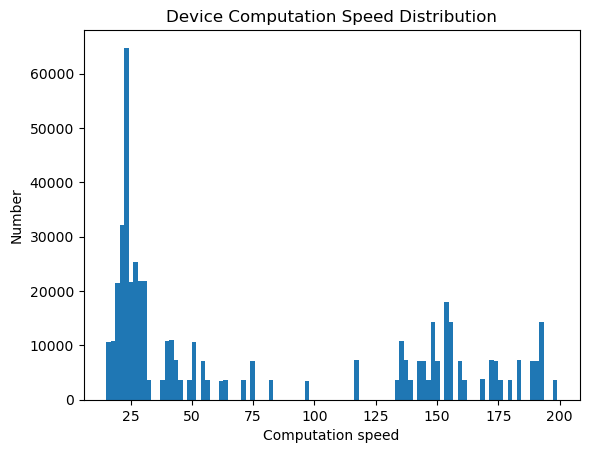

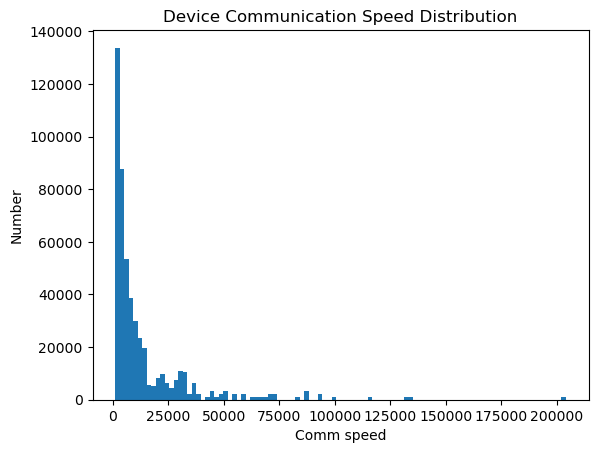

In [3]:
import pickle
import matplotlib.pyplot as plt

client_speed_dict = None
with open('../datasets/device_info/client_device_capacity', 'rb') as client_file:
    client_speed_dict = pickle.load(client_file)

speed_list = []
comm_list = []
for id, value in client_speed_dict.items():
    speed_list.append(value["computation"])
    comm_list.append(value["communication"])

print(len(client_speed_dict))

plt.hist(speed_list, bins=100)
plt.xlabel('Computation speed')
plt.ylabel('Number')
plt.title('Device Computation Speed Distribution')
plt.show()

plt.hist(comm_list, bins=100)
plt.xlabel('Comm speed')
plt.ylabel('Number')
plt.title('Device Communication Speed Distribution')
plt.show()


In [1]:
import pickle
import matplotlib.pyplot as plt

client_avail = None
with open('../datasets/device_info/client_behave_trace', 'rb') as client_file:
    client_avail = pickle.load(client_file)


In [4]:
print(client_avail[4])
print(len(client_avail))

{'duration': 666351, 'inactive': [4085, 6176, 9002, 10072, 450772, 478872, 481816, 512929, 512935, 521178, 532562, 536930, 537655, 565803, 569464, 603944, 609969, 612233, 615165, 619793, 651426, 655820, 691090, 694205, 697298, 747938, 791725, 795405, 824890, 828251, 911237, 915273], 'finish_time': 950400, 'active': [3266, 5750, 8838, 9382, 11012, 450831, 479288, 510581, 512929, 515702, 532058, 536176, 536999, 537802, 566455, 600193, 608289, 610724, 613937, 619407, 623769, 652696, 683400, 694112, 694261, 714219, 791620, 794375, 795860, 825617, 878450, 911564], 'model': 'SM-A207F'}
107749


In [4]:
id_list = [ i + 1 for i in range(10)]
val_list = [client_avail[i] for i in id_list]
sum = 0
num = 0
for val in val_list:
    active_list = val["active"]
    inactive_list = val["inactive"]
    for x in range(len(active_list)):
        sum += inactive_list[x] - active_list[x]
        num += 1

print(sum / num)

18876.267647058823


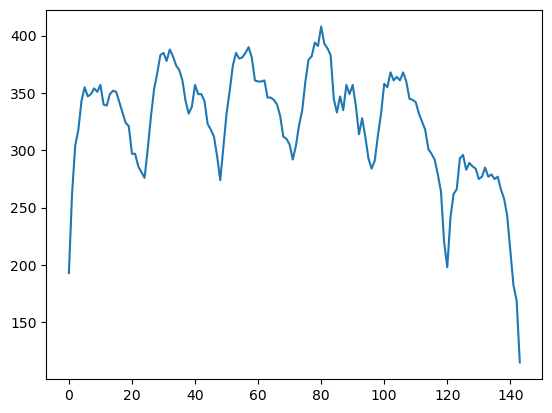

In [5]:
device = {i: client_avail[i+1] for i in range(500)}

avail_cnt = [0 for _ in range(24 * 6)]
for i in range(len(avail_cnt)):
    for id, val in device.items():
        inactive_list = val["inactive"]
        active_list = val["active"]
        for x in range(len(active_list)):
            if i * 60 * 60>= active_list[x] and i * 60 * 60< inactive_list[x]:
                avail_cnt[i] += 1

plt.plot(avail_cnt)
plt.show()

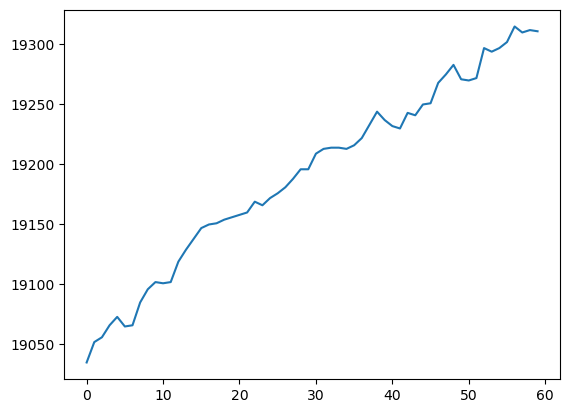

In [21]:
avail_cnt = [0 for _ in range(60)]
for i in range(len(avail_cnt)):
    for id, val in client_avail.items():
        inactive_list = val["inactive"]
        active_list = val["active"]
        for x in range(len(active_list)):
            if i + 60 >= active_list[x] and i + 60 < inactive_list[x]:
                avail_cnt[i] += 1

plt.plot(avail_cnt)
plt.show()